In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
import matplotlib.pyplot as plt


In [3]:
dataset=pd.read_csv('acquisizione_nuovo.csv', delimiter=',')




In [5]:

train_inputs = dataset.iloc[:, :-3]
targets=dataset.iloc[:,4 :].copy()
print(train_inputs)
print(targets)

      1382   1410   1508   1440
0     1342   1350   1114    404
1     1396   1342   1482   1416
2     1392   1356   1474   1448
3     1360   1354   1456   1394
4     1368   1306   1382   1424
...    ...    ...    ...    ...
3038  1058    898    998   1090
3039   900    854    920    888
3040   834    814    916    908
3041  1226   1280   1364   1294
3042  1022   1076   1062    948

[3043 rows x 4 columns]
       -0.490110   -0.414027   2.448998
0      -0.313621   -0.473726   2.451296
1      -0.229290   -0.452944   2.446117
2      -0.185492   -0.454540   2.441576
3      -0.109615   -0.480332   2.443028
4      -0.071701   -0.458809   2.440145
...          ...         ...        ...
3038    0.855083   -0.327841   1.662003
3039    0.553717    0.164347   1.616340
3040    0.232446   -0.191734   1.557882
3041   -0.447936   -0.292947   2.220300
3042   -0.304219    0.516745   1.821838

[3043 rows x 3 columns]


In [6]:


scaler = MinMaxScaler()
train_inputs= scaler.fit_transform(train_inputs)
scaler = MinMaxScaler()
targets= scaler.fit_transform(targets.values.reshape(-1, 3))


In [7]:
train_inputs1, targets1=shuffle(train_inputs, targets)

In [8]:
i = int(0.8 * train_inputs1.shape[0])

train_X = train_inputs1[:i]

test_X = train_inputs1[i:]

train_y = targets1[:i]

test_y = targets1[i:]



In [9]:

def make_model():
    input_size = 4 
    output_size = 3 
    

    model = Sequential() 
    model.add(Dense(50, input_dim=input_size))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(150, activation='relu'))
    model.add(Dense(150, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(output_size, activation='linear')) 

    opt = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='mean_squared_error', metrics=['MSE']) 

    print("Model Compiled")
    return model

model = make_model()
model.summary()








Model Compiled
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                250       
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 150)               15150     
                                                                 
 dense_3 (Dense)             (None, 150)               22650     
                                                                 
 dense_4 (Dense)             (None, 200)               30200     
                                                                 
 dense_5 (Dense)             (None, 3)                 603       
                                                                 
Total params: 73953 (288.88 KB)
Trainable

In [10]:
epochs = 1000
batch_size = 64


callbacks = [
    keras.callbacks.ModelCheckpoint(
    "modello_localizzatore.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss", factor=0.5, patience=50, min_lr=0.0001
    ),

]


model.compile(
    optimizer="adam",
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=["MSE"]


)

history = model.fit(
    train_inputs1,
    targets1,
    validation_data=(test_X, test_y),
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    verbose=1,
)

Epoch 1/1000
48/48 [==============================] - 8s 10ms/step - loss: 0.0879 - MSE: 0.0879 - val_loss: 0.0622 - val_MSE: 0.0622 - lr: 0.0010
Epoch 2/1000
48/48 [==============================] - 0s 5ms/step - loss: 0.0576 - MSE: 0.0576 - val_loss: 0.0475 - val_MSE: 0.0475 - lr: 0.0010
Epoch 3/1000
48/48 [==============================] - 0s 5ms/step - loss: 0.0392 - MSE: 0.0392 - val_loss: 0.0295 - val_MSE: 0.0295 - lr: 0.0010
Epoch 4/1000
48/48 [==============================] - 0s 5ms/step - loss: 0.0251 - MSE: 0.0251 - val_loss: 0.0204 - val_MSE: 0.0204 - lr: 0.0010
Epoch 5/1000
48/48 [==============================] - 0s 5ms/step - loss: 0.0209 - MSE: 0.0209 - val_loss: 0.0224 - val_MSE: 0.0224 - lr: 0.0010
Epoch 6/1000
48/48 [==============================] - 0s 5ms/step - loss: 0.0199 - MSE: 0.0199 - val_loss: 0.0184 - val_MSE: 0.0184 - lr: 0.0010
Epoch 7/1000
48/48 [==============================] - 0s 5ms/step - loss: 0.0188 - MSE: 0.0188 - val_loss: 0.0180 - val_MSE: 0.01

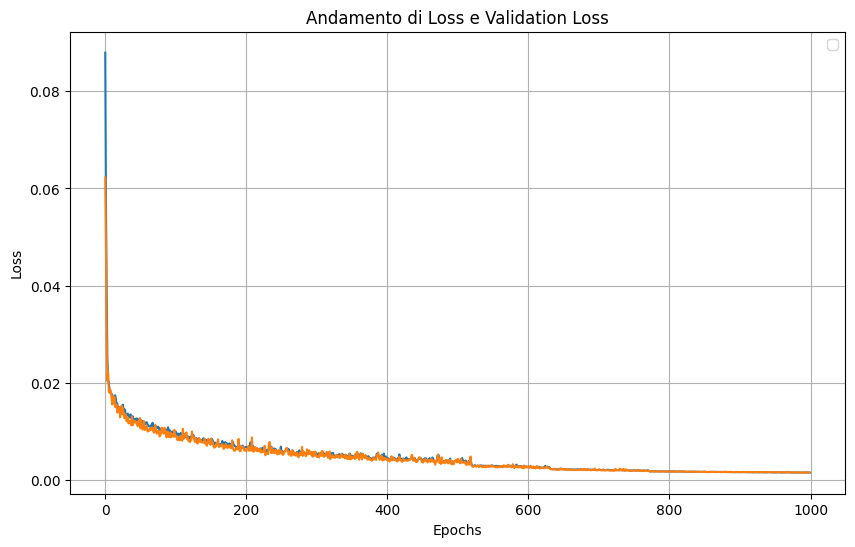

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


plt.xlabel('Epoche')
plt.title('Loss e Validation Loss')
plt.legend()

plt.grid(True)
plt.show()

In [13]:
testY_non_scalati=scaler.inverse_transform(test_y)

In [14]:
prediction=model.predict(test_X)

20/20 [==============================] - 0s 2ms/step


In [15]:
prediction_non_scalati=scaler.inverse_transform(prediction)

In [18]:

for i in range(len(prediction)):
    print(prediction_non_scalati[i], testY_non_scalati[i])


[-0.16087975  0.21312186  1.8842636 ] [-0.160736  0.230304  1.885474]
[0.23334791 0.10495178 1.5753431 ] [0.345074 0.23031  1.570499]
[0.37329334 0.019842   1.57371   ] [ 0.336705 -0.031437  1.576808]
[0.7250472  0.05002825 1.9173583 ] [0.7339   0.011547 1.903519]
[-0.33944902  0.16265292  2.4040442 ] [-0.279934  0.068695  2.418861]
[0.29243943 0.15934372 1.8939182 ] [0.478921 0.091099 1.893154]
[-0.13782306  0.8003902   1.8490033 ] [-0.149504  0.79414   1.860856]
[ 0.78745323 -0.49406084  2.0409472 ] [ 0.749695 -0.429156  2.077333]
[-0.15454747  0.5405763   1.7226079 ] [-0.198766  0.538991  1.738457]
[ 0.07985134 -0.01113388  1.5717068 ] [ 0.076107 -0.005479  1.568715]
[-0.3109832 -0.1277051  2.4362185] [-0.303988 -0.087379  2.421841]
[ 0.68205345 -0.08560496  1.893802  ] [ 0.536208 -0.036208  1.936293]
[0.7310202 1.170224  2.4159143] [0.731282 1.186254 2.414602]
[0.20972279 0.9340008  1.8255966 ] [0.256975 0.912317 1.85593 ]
[-0.44273916  0.3464511   1.5561686 ] [-0.450124  0.320773 

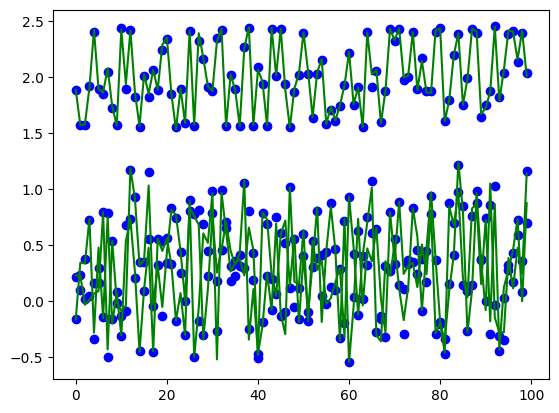

In [19]:


plt.figure()
plt.plot(prediction_non_scalati[:100], 'bo')
plt.plot(testY_non_scalati[:100], color='g')
plt.show()
